# **Capstone Project - Dog Breed Classification & Object Detection**
**Woojong Choi**

### **Capstone objective:**
**Objective**:
This capstone project encompasses two distinct yet interconnected tasks within the realm of computer vision:

**Task 1**: The primary objective is to develop a multi-class image classification application capable of accurately predicting various dog breeds. This application provides breed predictions for both static images and real-time webcam captures. The project aims to achieve a high level of classification accuracy, with a target score of 85% or higher, emphasizing the model's proficiency in dog breed recognition under various conditions.

**Task 2**: In parallel, the project delves into the field of object detection. Specifically, it aims to build an object detection model to identify a specific dog breed, Norwich Terriers, within images and videos. The success criteria for the object detection model include achieving a mean Average Precision at IoU threshold 0.50 (mAP50) score of 0.80 or higher.

## Task 1: Multi-class image classification

## Dataset:
- https://www.kaggle.com/datasets/kabilan03/dogbreedclassification

## **Data Cleaning & EDA**

### Imports

#### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading data

In [ ]:
# checking whether the file names for training, validation, and test sets are consistent and if the number of categories are the same

train_path = '/content/drive/MyDrive/general_assembly/capstone/data/train'
train_categories = sorted([category for category in os.listdir(train_path) if not category.startswith('.')])

val_path = '/content/drive/MyDrive/general_assembly/capstone/data/val'
val_categories = sorted([category for category in os.listdir(val_path) if not category.startswith('.')])

test_path = '/content/drive/MyDrive/general_assembly/capstone/data/test'
test_categories = sorted([category for category in os.listdir(test_path) if not category.startswith('.')])

print(f'train: {len(train_categories)}, val: {len(val_categories)}, test: {len(test_categories)}')

print([category for category in train_categories if category not in val_categories])
print([category for category in train_categories if category not in test_categories])
print([category for category in val_categories if category not in test_categories])

train: 93, val: 93, test: 93
[]
[]
[]


In [ ]:
train_categories

['afghan_hound',
 'african_hunting_dog',
 'airedale',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'brabancon_griffon',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'entlebucher',
 'flat-coated_retriever',
 'german_shepherd',
 'german_short-haired_pointer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'groenendael',
 'ibizan_hound',
 'irish_setter',
 'irish_terrier',
 'irish_water_spaniel',
 'irish_wolfhound',
 'japanese_spaniel',
 'keeshond',
 'kerry_blue_terrier',
 'komondor',
 'kuvasz',
 'labrador_retriever',
 'leonberg',
 'lhasa',
 'malamute',
 'malinois',
 'maltese',
 'mexican_ha

In [ ]:
# importing and processing images for train
# importing labels for train
# converting list of image data and labels to numpy arrays

train_data = []
train_labels = []

for category in train_categories:
    category_directory = os.path.join(train_path, category)

    for image in os.listdir(category_directory):
        image_path = os.path.join(category_directory, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (299, 299))
        train_data.append(img)
        train_labels.append(train_categories.index(category))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
# importing and processing images for validation
# importing labels for validation
# converting list of image data and labels to numpy arrays

val_data = []
val_labels = []

for category in val_categories:
    category_directory = os.path.join(val_path, category)

    for image in os.listdir(category_directory):
        image_path = os.path.join(category_directory, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (299, 299))
        val_data.append(img)
        val_labels.append(val_categories.index(category))

val_data = np.array(val_data)
val_labels = np.array(val_labels)

In [ ]:
# importing and processing images for validation
# importing labels for validation
# converting list of image data and labels to numpy arrays

test_data = []
test_labels = []

for category in test_categories:
    category_directory = os.path.join(test_path, category)

    for image in os.listdir(category_directory):
        image_path = os.path.join(category_directory, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (299, 299))
        test_data.append(img)
        test_labels.append(test_categories.index(category))

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
# Saving train, validation and test data and labels

save_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array'

np.save(os.path.join(save_path, 'train_data.npy'), train_data)
np.save(os.path.join(save_path, 'train_labels.npy'), train_labels)
np.save(os.path.join(save_path, 'val_data.npy'), val_data)
np.save(os.path.join(save_path, 'val_labels.npy'), val_labels)
np.save(os.path.join(save_path, 'test_data.npy'), test_data)
np.save(os.path.join(save_path, 'test_labels.npy'), test_labels)

In [ ]:
# checking if the unique labels are consistent across train, validation and test

print(np.unique(train_labels))
print(np.unique(val_labels))
print(np.unique(test_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]


In [ ]:
# cleaning up dog breed names
# removing _, - and making breed names title case
# saving dog breed names for later (streamlit)

categories = sorted([category for category in os.listdir(train_path) if not category.startswith('.')])
categories = [category.replace('_', ' ').replace('-', ' ').title() for category in categories]

with open('/content/drive/MyDrive/general_assembly/capstone/other/breed_categories.pickle', 'wb') as f:
  pickle.dump(categories, f)

In [ ]:
# Define a function to display random images

def show_random_images(data, labels, categories, num_samples, image_name):
  '''
  Input: data, labels, categories, sample count, image name for saving.
  Output: Specified number of randomly selected images with class label.
  '''
  plt.figure(figsize=(12, 5))
  for i in range(num_samples):
    index1 = random.randint(0, len(data) - 1)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(data[index1])
    plt.title(categories[labels[index1]])
    plt.axis('off')
  plt.savefig(f"/content/drive/MyDrive/general_assembly/capstone/assets/random_images_{image_name}.jpg")
  plt.show()

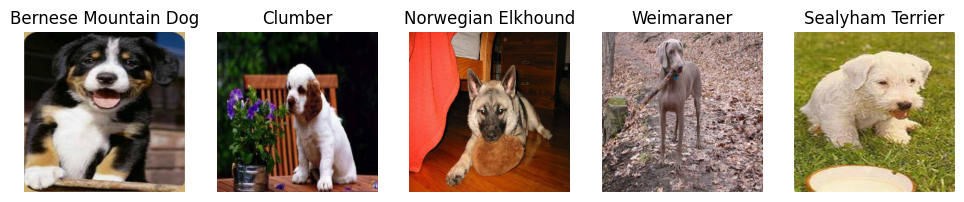

In [ ]:
show_random_images(train_data, train_labels, categories, 5, 'random1')

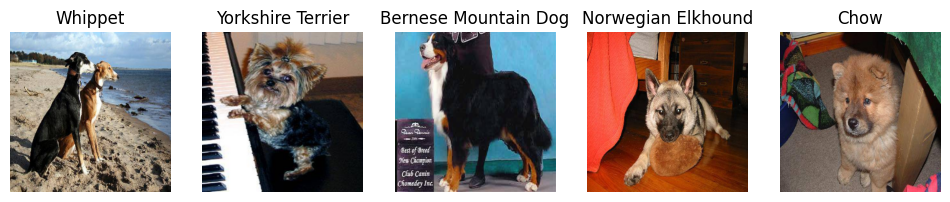

In [ ]:
show_random_images(train_data, train_labels, categories, 5, 'random2')

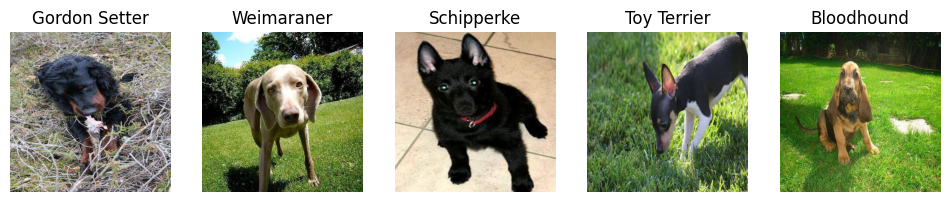

In [ ]:
show_random_images(train_data, train_labels, categories, 5, 'random3')

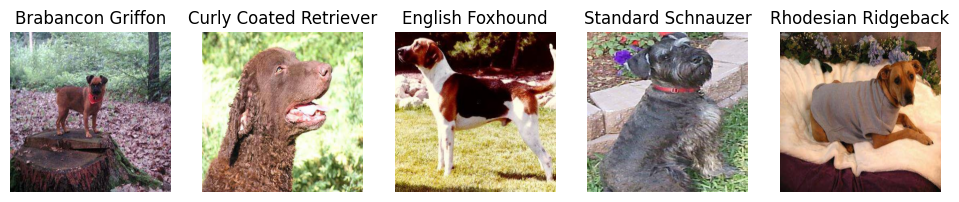

In [ ]:
show_random_images(train_data, train_labels, categories, 5, 'random4')

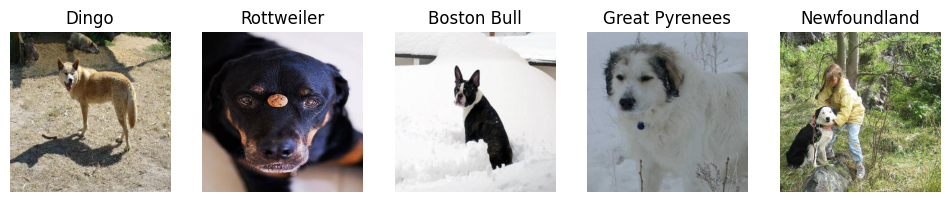

In [ ]:
show_random_images(train_data, train_labels, categories, 5, 'random5')

### EDA

In [ ]:
# Reading image data and labels

train_data_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/train_data.npy'
train_labels_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/train_labels.npy'
val_data_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/val_data.npy'
val_labels_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/val_labels.npy'
test_data_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/test_data.npy'
test_labels_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/test_labels.npy'

train_data = np.load(train_data_path)
train_labels = np.load(train_labels_path)
val_data = np.load(val_data_path)
val_labels = np.load(val_labels_path)
test_data = np.load(test_data_path)
test_labels = np.load(test_labels_path)

Train: 6405
Val: 766
Test: 891
------------
Total: 8062


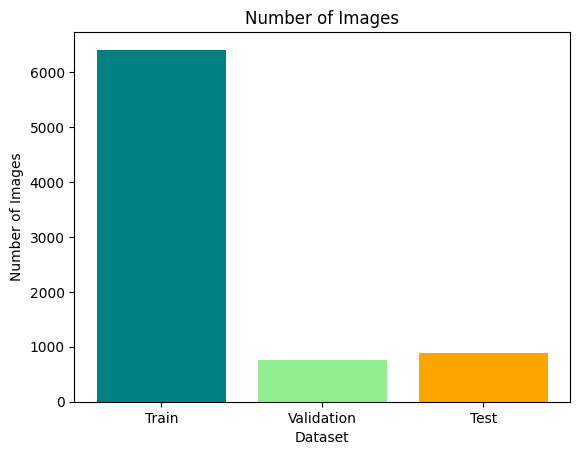

In [ ]:
# number of images

train_len = len(train_data)
val_len = len(val_data)
test_len = len(test_data)

print(f'Train: {train_len}')
print(f'Val: {val_len}')
print(f'Test: {test_len}')
print('-' * 12)
print(f'Total: {train_len+val_len+test_len}')

datasets = ['Train', 'Validation', 'Test']
datasets_len = [train_len, val_len, test_len]

plt.bar(datasets, datasets_len, color=['teal', 'lightgreen', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Number of Images')
plt.savefig(f"/content/drive/MyDrive/general_assembly/capstone/assets/number_of_images.jpg")
plt.show()

In [ ]:
# label distribution

labels, counts = np.unique(train_labels, return_counts=True)

labels_to_category = {label: category_name for label, category_name in zip(labels, categories)}

for label, count in zip(labels, counts):
  category_name = labels_to_category[label]
  print(f'{category_name}: {count}')

Afghan Hound: 92
African Hunting Dog: 68
Airedale: 85
Basenji: 88
Basset: 65
Beagle: 84
Bedlington Terrier: 71
Bernese Mountain Dog: 91
Black And Tan Coonhound: 61
Blenheim Spaniel: 81
Bloodhound: 68
Bluetick: 68
Border Collie: 57
Border Terrier: 72
Borzoi: 60
Boston Bull: 69
Bouvier Des Flandres: 68
Brabancon Griffon: 53
Bull Mastiff: 60
Cairn: 84
Cardigan: 60
Chesapeake Bay Retriever: 66
Chow: 74
Clumber: 64
Cocker Spaniel: 59
Collie: 69
Curly Coated Retriever: 57
Dhole: 60
Dingo: 64
Doberman: 59
English Foxhound: 68
English Setter: 66
Entlebucher: 92
Flat Coated Retriever: 57
German Shepherd: 55
German Short Haired Pointer: 60
Golden Retriever: 53
Gordon Setter: 64
Great Dane: 60
Great Pyrenees: 88
Groenendael: 65
Ibizan Hound: 72
Irish Setter: 70
Irish Terrier: 65
Irish Water Spaniel: 62
Irish Wolfhound: 80
Japanese Spaniel: 84
Keeshond: 64
Kerry Blue Terrier: 65
Komondor: 53
Kuvasz: 56
Labrador Retriever: 67
Leonberg: 84
Lhasa: 72
Malamute: 64
Malinois: 58
Maltese: 93
Mexican Hair

Avg. number of images per breed: 68.87
Min: 53
Max: 100


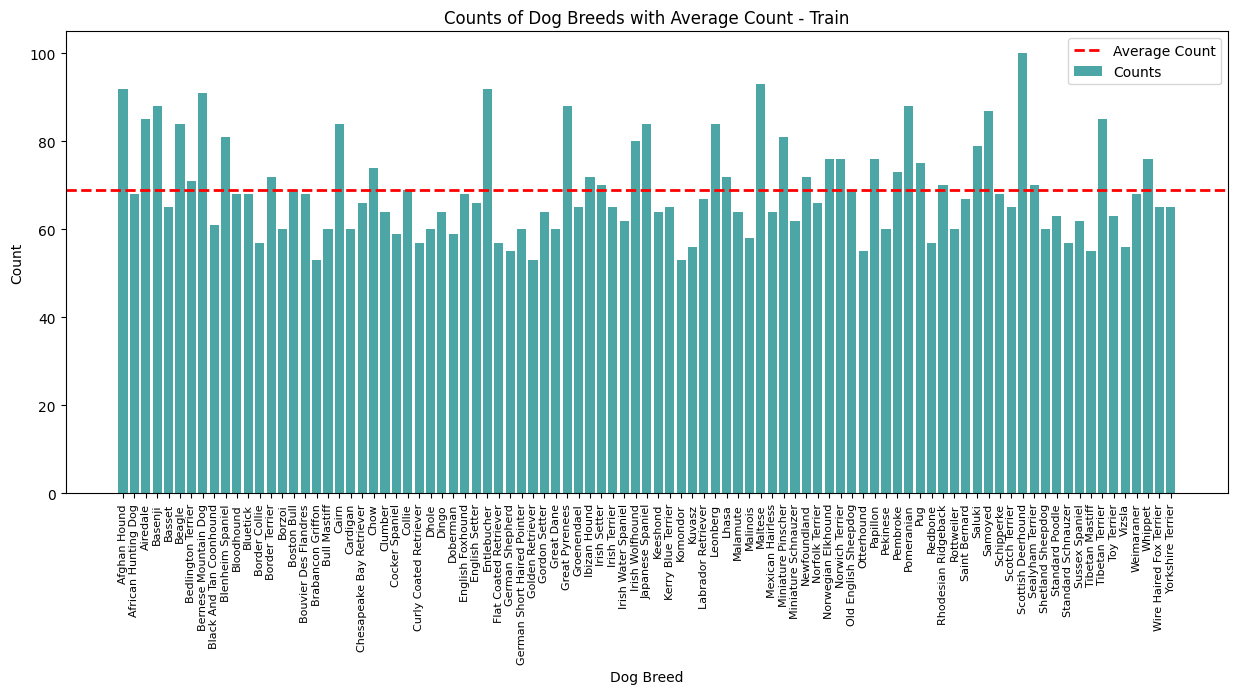

In [ ]:
labels, counts = np.unique(train_labels, return_counts=True)
labels_to_category = {label: category_name for label, category_name in zip(labels, categories)}

category_names = [labels_to_category[label] for label in labels]
category_counts = counts

average_count = np.mean(category_counts)
min_count = np.min(category_counts)
max_count = np.max(category_counts)
print(f'Avg. number of images per breed: {round(average_count,2)}')
print(f'Min: {min_count}')
print(f'Max: {max_count}')

plt.figure(figsize=(15, 6))
plt.bar(category_names, category_counts, color='teal', alpha=0.7, label='Counts')
plt.axhline(average_count, color='red', linestyle='--', linewidth=2, label='Average Count')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Counts of Dog Breeds with Average Count - Train')
plt.legend()
plt.xticks(rotation=90, fontsize=8)
plt.savefig(f"/content/drive/MyDrive/general_assembly/capstone/assets/train_counts_of_breeds.jpg")
plt.show()

The average number of images per breed is around 69 images, with the minimum of 50 and maximum of 100 images.

112.65263170533005
112.23762199084051
111.93296359982413


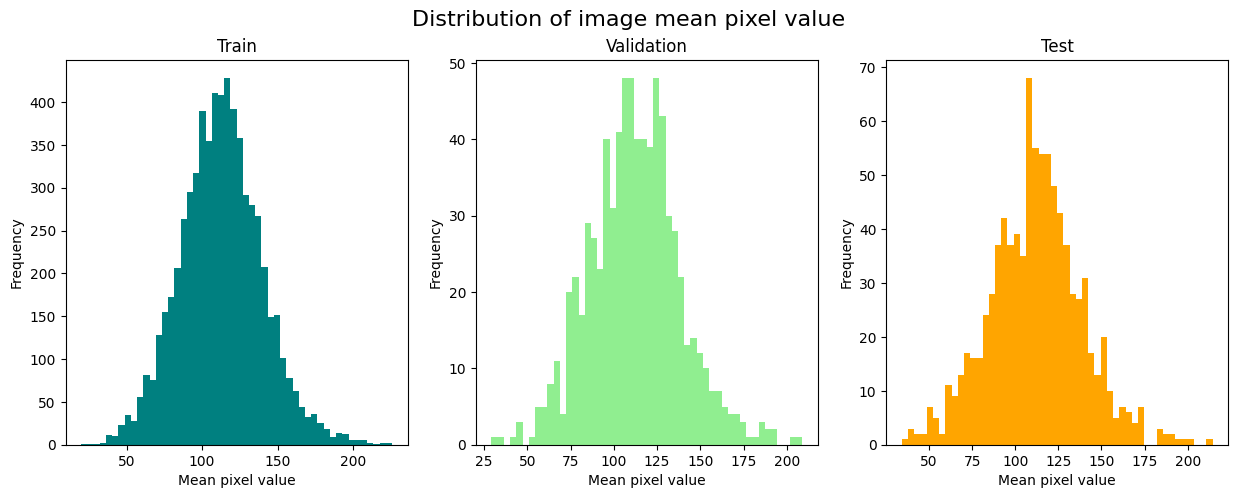

In [ ]:
# Checking distribution of pixel color values

train_image_pixel_mean = [np.mean(image) for image in train_data]
print(np.mean(train_image_pixel_mean))

val_image_pixel_mean = [np.mean(image) for image in val_data]
print(np.mean(val_image_pixel_mean))

test_image_pixel_mean = [np.mean(image) for image in test_data]
print(np.mean(test_image_pixel_mean))

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of image mean pixel value', fontsize=16)

plt.subplot(1,3,1)
plt.hist(train_image_pixel_mean, bins=50, color='teal')
plt.title('Train')
plt.xlabel('Mean pixel value')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(val_image_pixel_mean, bins=50, color='lightgreen')
plt.title('Validation')
plt.xlabel('Mean pixel value')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(test_image_pixel_mean, bins=50, color='orange')
plt.title('Test')
plt.xlabel('Mean pixel value')
plt.ylabel('Frequency')

plt.savefig('/content/drive/MyDrive/general_assembly/capstone/assets/distribution_of_image_mean_pixel_value.jpg')
plt.show()

The distribution and the mean pixel (color) values are very similar for train, validation and test images.

In [ ]:
# Checking mean pixel color value by breed - Train

mean_pixel_values = {}
counts = {}

for image, label in zip(train_data, train_labels):
    mean_pixel = np.mean(image)
    breed = categories[label]

    if breed in mean_pixel_values:
      mean_pixel_values[breed].append(mean_pixel)
      counts[breed] += 1
    else:
      mean_pixel_values[breed] = [mean_pixel]
      counts[breed] = 1

breed_mean_pixel_values = {}
for breed, pixel_values in mean_pixel_values.items():
  breed_mean_pixel_values[breed] = np.mean(pixel_values)

for breed, mean_pixel_value in breed_mean_pixel_values.items():
    print(f'{breed}: {round(mean_pixel_value,2)}')

Afghan Hound: 116.9
African Hunting Dog: 111.93
Airedale: 113.12
Basenji: 111.53
Basset: 101.24
Beagle: 109.42
Bedlington Terrier: 110.15
Bernese Mountain Dog: 104.44
Black And Tan Coonhound: 118.04
Blenheim Spaniel: 109.26
Bloodhound: 112.68
Bluetick: 110.07
Border Collie: 111.44
Border Terrier: 118.57
Borzoi: 109.38
Boston Bull: 105.64
Bouvier Des Flandres: 117.16
Brabancon Griffon: 110.3
Bull Mastiff: 121.95
Cairn: 113.6
Cardigan: 109.08
Chesapeake Bay Retriever: 117.65
Chow: 116.71
Clumber: 103.64
Cocker Spaniel: 117.58
Collie: 114.56
Curly Coated Retriever: 117.55
Dhole: 109.06
Dingo: 107.9
Doberman: 120.23
English Foxhound: 109.2
English Setter: 102.23
Entlebucher: 110.08
Flat Coated Retriever: 120.84
German Shepherd: 125.22
German Short Haired Pointer: 112.2
Golden Retriever: 117.92
Gordon Setter: 105.27
Great Dane: 115.18
Great Pyrenees: 101.42
Groenendael: 117.55
Ibizan Hound: 105.86
Irish Setter: 110.46
Irish Terrier: 108.21
Irish Water Spaniel: 115.58
Irish Wolfhound: 114.07

112.8


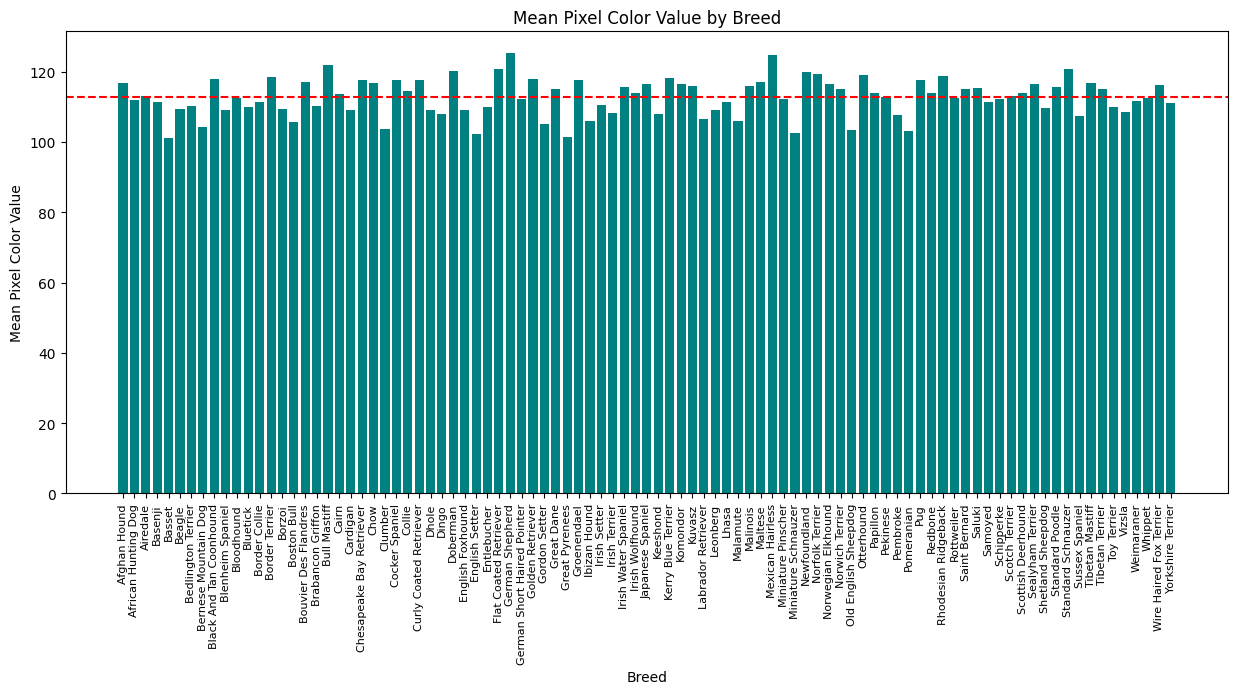

In [ ]:
# Checking mean pixel color value by breed - Train

breed_names = list(breed_mean_pixel_values.keys())
mean_pixel_values = list(breed_mean_pixel_values.values())
overall_mean_pixel = np.mean(mean_pixel_values)
print(round(overall_mean_pixel,2))

plt.figure(figsize=(15, 6))
plt.bar(breed_names, mean_pixel_values, color='teal', label='Breed Mean')
plt.axhline(y=overall_mean_pixel, color='red', linestyle='--', label='Overall Mean')
plt.xlabel('Breed')
plt.ylabel('Mean Pixel Color Value')
plt.title('Mean Pixel Color Value by Breed')
plt.xticks(rotation=90, fontsize=8)
plt.savefig('/content/drive/MyDrive/general_assembly/capstone/assets/mean_pixel_color_value_by_breed.jpg')
plt.show()

The mean pixel (color) values by breed fall between approximately 100 to 125 range.

Red: 121.79
Green: 115.83
Blue: 100.34


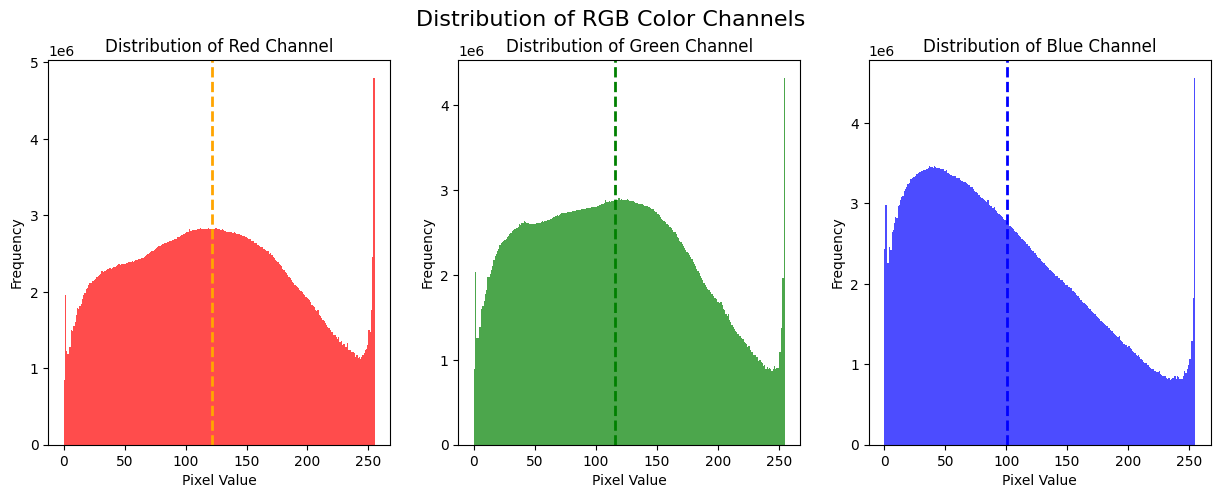

In [ ]:
red_mean = np.mean(train_data[:, :, :, 0])
green_mean = np.mean(train_data[:, :, :, 1])
blue_mean = np.mean(train_data[:, :, :, 2])

print(f'Red: {round(red_mean,2)}')
print(f'Green: {round(green_mean,2)}')
print(f'Blue: {round(blue_mean,2)}')

plt.figure(figsize=(15, 5))
plt.suptitle('Distribution of RGB Color Channels', fontsize=16)

plt.subplot(1, 3, 1)
plt.hist(train_data[:, :, :, 0].ravel(), bins=256, color='red', alpha=0.7, label='Red Channel')
plt.axvline(red_mean, color='orange', linestyle='--', linewidth=2)
plt.title('Distribution of Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(train_data[:, :, :, 1].ravel(), bins=256, color='green', alpha=0.7, label='Green Channel')
plt.axvline(green_mean, color='green', linestyle='--', linewidth=2)
plt.title('Distribution of Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(train_data[:, :, :, 2].ravel(), bins=256, color='blue', alpha=0.7, label='Blue Channel')
plt.axvline(blue_mean, color='blue', linestyle='--', linewidth=2)
plt.title('Distribution of Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.savefig('/content/drive/MyDrive/general_assembly/capstone/assets/distribution_of_rgb_color_channels.jpg')
plt.show()

Red is the most predominant color channel, followed closely by Green and Blue. However, in general, all three colors are used quite evenly in images.

----